In [8]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
import matplotlib.pyplot as plt

In [2]:
(x_train,t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [3]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [4]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(train_size/batch_size,1)

In [5]:
network = TwoLayerNet(input_size=784, hidden_size = 100, output_size = 10)

In [6]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #gradient
    #grad = network.numerical_gradient(x_batch,t_batch)
    grad = network.gradient(x_batch,t_batch)
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
    
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc : " + str(train_acc)+ ", "+ str(test_acc))

train acc, test acc : 0.104416666667, 0.1028
train acc, test acc : 0.80735, 0.8142
train acc, test acc : 0.880166666667, 0.8865
train acc, test acc : 0.90075, 0.9044
train acc, test acc : 0.907983333333, 0.9107
train acc, test acc : 0.913933333333, 0.9159
train acc, test acc : 0.919, 0.9225
train acc, test acc : 0.922966666667, 0.9252
train acc, test acc : 0.92665, 0.9279
train acc, test acc : 0.929466666667, 0.9304
train acc, test acc : 0.93255, 0.9341
train acc, test acc : 0.93575, 0.9353
train acc, test acc : 0.937366666667, 0.9365
train acc, test acc : 0.940716666667, 0.9404
train acc, test acc : 0.943016666667, 0.9426
train acc, test acc : 0.94425, 0.9432
train acc, test acc : 0.946366666667, 0.945


In [ ]:
train_loss_list

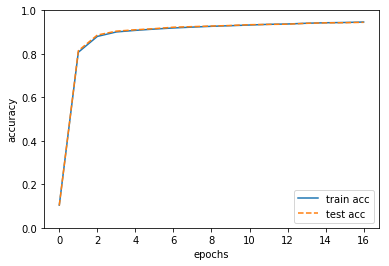

In [9]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
